In [1]:
import math
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as geek 
from scipy.optimize import minimize, LinearConstraint, BFGS, Bounds
from scipy import optimize
import matplotlib.colors as pltcolors
from scipy.stats import norm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Mushroom2-Dataset.csv')

In [4]:
na_count=df.isna().sum()*100/df.shape[0]
na_count

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

In [5]:
#Drop the variables which have more than 80% missing values
x=pd.DataFrame(data=na_count,columns=["Missing Values"]).reset_index()
x.rename(columns={"index":"Column"}, inplace=True)
y=x[x["Missing Values"]>60]
df1=df.drop(y["Column"],axis=1)

In [6]:
##imputing "Unknown" class to all the remaining null values
df2 = df1.fillna("Unknown")
df2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,Unknown,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,Unknown,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,Unknown,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,Unknown,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,Unknown,w,16.53,17.20,w,t,p,d,w


In [7]:
df2.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [8]:
#Target Class: To check if dataset is imbalanced
target_class = df2["class"].value_counts()
target_class

p    33888
e    27181
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

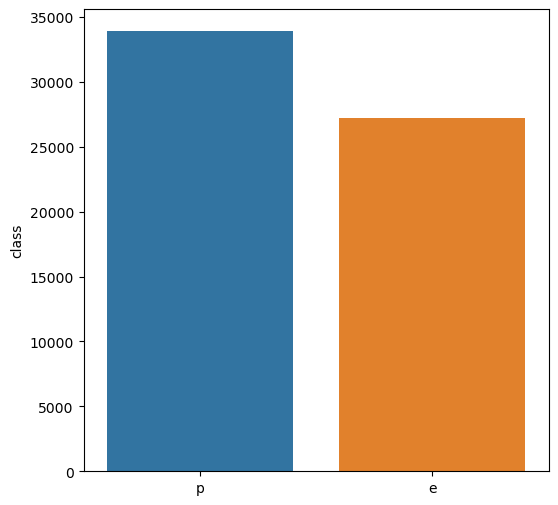

In [12]:
feature_count = df2['class'].value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x = feature_count.index, y = feature_count)

<AxesSubplot:>

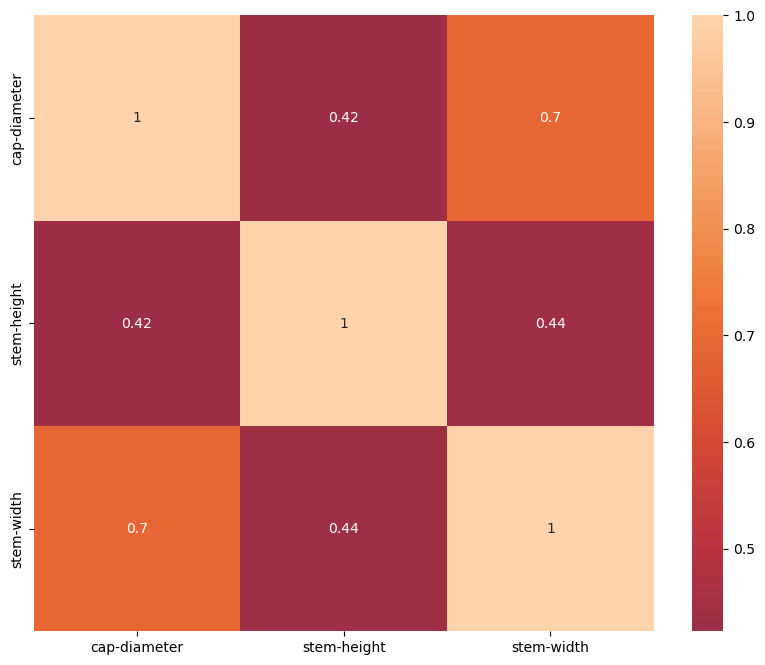

In [13]:
# Finding Correlation between between numerical variables through Heatmap
corr = df2.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.heatmap(corr, annot = True, center=0, ax = ax)

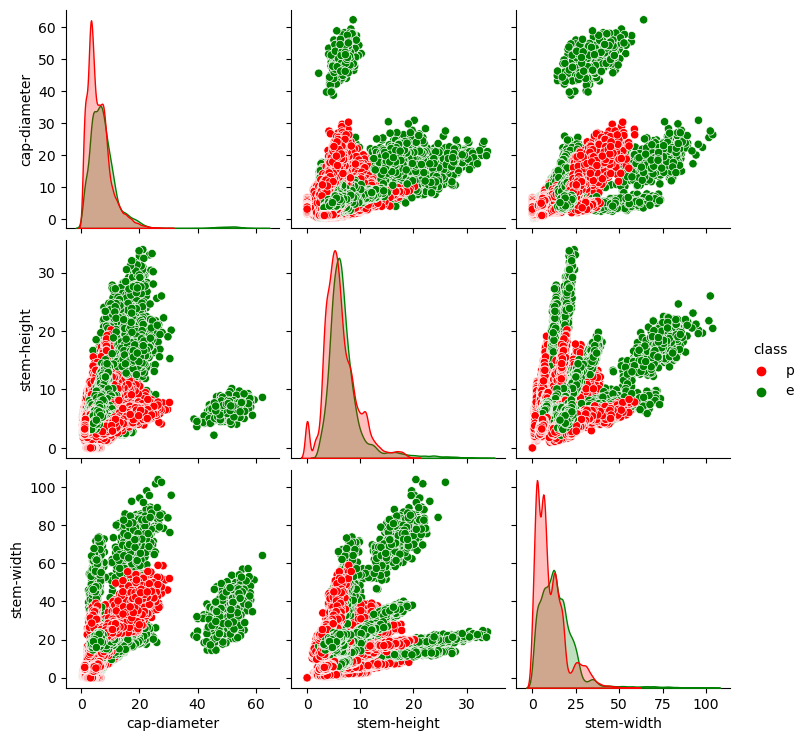

In [14]:
import seaborn as sns
#corr_var = df2[["cap-diameter","stem-height","stem-width"]]
sns.pairplot(df2, hue='class', palette={'p': 'red', 'e': 'green'})

In [15]:
df2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,Unknown,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,Unknown,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,Unknown,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,Unknown,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,Unknown,w,16.53,17.20,w,t,p,d,w


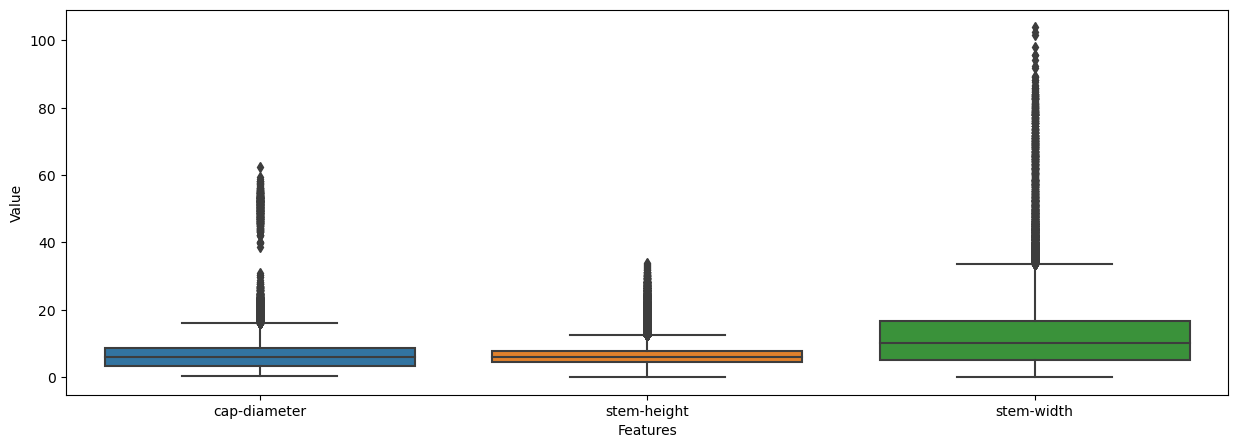

In [16]:
# Boxplots showing the Outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df2.drop(['class','cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
            'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color',
            'has-ring', 'ring-type', 'habitat', 'season'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [17]:
#One-Hot Encoding
cat_var= ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
            'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color',
            'has-ring', 'ring-type', 'habitat', 'season']

df3 = pd.get_dummies(df2, columns=cat_var)

In [77]:
df3.head()

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,15.26,16.95,17.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,p,16.60,17.99,18.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,p,14.07,17.80,17.74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,p,14.17,15.77,15.98,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,p,14.64,16.53,17.20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
df4= df3

In [79]:
# create X and y matrices
X = df4.drop('class', axis=1).values # drop the 'class' column and convert to numpy array
y = np.where(df4['class'] == 'p', 1, 0) # create a binary target variable (1 for poisonous, 0 for edible)

print(X.shape)
print(y.shape)

(61069, 96)
(61069,)


In [144]:
class GaussianNaiveBayes:
    def __init__(self, X, y, n_features):
        self.X = X
        self.y = y
        self.n_features = n_features

    def splitData(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                        test_size = 0.2,
                                                        random_state =1)
        return X_train, X_test, y_train, y_test

    def distribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean, std)
        return dist

    def probability(self, x, prior, dist):
        prob = prior
        for i in range(self.n_features):
            prob *= dist[i].pdf(x[i])
        return prob

    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.splitData()
        # separate data by class
        X0_train = self.X_train[self.y_train == 0]
        X1_train = self.X_train[self.y_train == 1]

        self.prior0 = len(X0_train)/len(self.X_train)
        self.prior1 = len(X1_train)/len(self.X_train)

        self.dist_X0 = []
        self.dist_X1 = []
        for i in range(self.n_features):
            self.dist_X0.append(self.distribution(X0_train[:,i]))
            self.dist_X1.append(self.distribution(X1_train[:,i]))

    def predict(self):
        true_positives = 0
        false_positives = 0
        false_negatives = 0

        for sample, target in zip(self.X_test, self.y_test):  # iterate over 2 list with same indices
            py0 = self.probability(sample, self.prior0, self.dist_X0)
            py1 = self.probability(sample, self.prior1, self.dist_X1)

            predicted_class = np.argmax([py0, py1])
            if predicted_class == target and target == 1:
                true_positives += 1
            elif predicted_class == 1 and target == 0:
                false_positives += 1
            elif predicted_class == 0 and target == 1:
                false_negatives += 1

        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_score = 2 * (precision * recall) / (precision + recall)

        print("Precision: {:.3f}".format(precision))
        print("Recall: {:.3f}".format(recall))
        print("F1score: {:.3f}".format(f1_score))

In [147]:
clf = GaussianNaiveBayes(X, y, n_features=83)

In [148]:
clf.fit()

In [149]:
clf.predict()

ZeroDivisionError: division by zero

In [71]:
class LogisticRegression:
    def __init__(self, X, y, learningRate, tolerance, maxIteration, gd, regularization, ridge_lambda, lasso):
        self.tolerance = tolerance
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.X= X
        self.y= y
        self.w = None
        self.gd = gd
        self.regularization= regularization
        self.ridge_lambda = ridge_lambda
        self.lasso=lasso
        
        
    def splitData(self):
        X_Train, X_Test, y_Train, y_Test = train_test_split(self.X,self.y,test_size=0.3,random_state=0,shuffle=True)
        return X_Train, X_Test, y_Train, y_Test

    def sigmoid(self, z):
        sig = 1/(1+np.exp(-z))
        return sig

    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        # approach1
        cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
        cost = -cost/X.shape[0]
        return cost
    
    def costFunction1(self,X,y):
        return self.costFunction

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        gradient = (sig-y).dot(X)
        return gradient
    
    def gradientDescent(self, X, y):
        errors = []
        last_error = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('model stopped learning')
                break
    
    ## COST FUNCTION WITH REGULARIZATION - RIDGE REGRESSION
    def costFunctionWithRegularization(self,X,y):
        return self.costFunction(X,y) + (self.ridge_lambda*np.sum(self.w**2))/2

    ## COST FUNCTION DERIVATIVE WITH REGULARIZATION- RIDGE REGRESSION
    def costDerivativeWithRegularization(self,X,y):
        y_hat = self.predict(X)
        return (y_hat - y).dot(X) + self.ridge_lambda*self.w

    ## GRADIENT DESCENT WITH REGULARIZATION- RIDGE REGRESSION
    def gradientWithRegularization(self,X_Train,y_Train):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
            gradient = self.costDerivativeWithRegularization(X_Train,y_Train)
            self.w = self.w - (self.learningRate * gradient)
            current_error = self.costFunctionWithRegularization(X_Train,y_Train)
            error_diff= error_prev - current_error
            error_prev = current_error
            errors.append(current_error)
            if np.abs(error_diff) < self.tolerance:
                print('Model stopped running')
                break
    
    ## COST FUNCTION DERIVATIVE WITH REGULARIZATION - LASSO REGRESSION
    def costFunctionWithRegularizationLasso(self,X,y):
        return self.costFunction(X,y) + (self.ridge_lambda*np.sum(abs(self.w)))
    
    def costDerivativeWithRegularizationLasso(self,X,y):
        y_hat = self.predict(X)
        return (y_hat - y).dot(X) + geek.sign(self.w)
    
    ## GRADIENT DESCENT WITH REGULARIZATION - LASSO REGRESSION
    def gradientWithRegularizationLasso(self,X_Train,y_Train):
        errors = []
        error_prev = np.inf
        for i in tqdm(range(self.maxIteration)):
            gradient = self.costDerivativeWithRegularizationLasso(X_Train,y_Train)
            self.w = self.w - (self.learningRate * gradient)
            current_error = self.costFunctionWithRegularizationLasso(X_Train,y_Train)
            error_diff= error_prev - current_error
            error_prev = current_error
            errors.append(current_error)
            if np.abs(error_diff) < self.tolerance:
                print('Model stopped running')
                break

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)   
    
    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat == 1)                
        recall = (y & y_hat).sum()/y.sum()
        precision = (y & y_hat).sum()/y_hat.sum()
        f_score = 2*(precision*recall)/(precision+recall)
        return f_score, recall, precision
    
    
    def fit(self):
        X_train,X_test,y_train,y_test = self.splitData()
        print('Solving using Gradient Descent')
        
        if self.gd and not self.regularization and not self.lasso:
            print('Solved using gradient descent without regularization')
            self.w = np.ones(X_train.shape[1])
            self.gradientDescent(X_train,y_train)
            
        elif self.gd and self.regularization and not self.lasso:
            print('Solved using gradient descent with regularization- RIDGE REGRESSION')
            self.w = np.zeros(X_train.shape[1])
            self.gradientWithRegularization(X_train,y_train)
        
        elif self.gd and not self.regularization and self.lasso:
            print('Solved using gradient descent with regularization- LASSO REGRESSION')
            self.w = np.zeros(X_train.shape[1])
            self.gradientWithRegularizationLasso(X_train,y_train)
        
        y_train_hat = self.predict(X_train)
        y_test= self.predict(X_test)
        f_score, recall, precision = self.evaluate(y_train, y_train_hat)
        print('Training F1 score {}'.format(f_score))
        print('Training recall score {}'.format(recall))
        print('Training precision score {}'.format(precision))
        
        
    

In [72]:
lr = LogisticRegression(X,y, learningRate = 0.0001, tolerance = 0.00005, maxIteration = 5000, gd=True,regularization=False,lasso=False, ridge_lambda=None)

In [73]:
lr.fit()

Solving using Gradient Descent
Solved using gradient descent without regularization


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:59<00:00, 83.45it/s]

Training F1 score 0.38687690498476013
Training recall score 0.34207622442916563
Training precision score 0.4451808892571113


In [74]:
lr = LogisticRegression(X,y, learningRate = 0.0001, tolerance = 0.00005, maxIteration = 5000, gd=True,regularization=True,lasso=False, ridge_lambda=0.001)

In [75]:
lr.fit()

Solving using Gradient Descent
Solved using gradient descent with regularization- RIDGE REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:26<00:00, 57.84it/s]


Training F1 score 0.6460304996487168
Training recall score 0.6634411340293693
Training precision score 0.6295103092783505


In [53]:
lr = LogisticRegression(X,y, learningRate = 0.0001, tolerance = 0.00005, maxIteration = 5000, gd=True,regularization=False,lasso=True, ridge_lambda=0.001)

In [54]:
lr.fit()

Solving using Gradient Descent
Solved using gradient descent with regularization- LASSO REGRESSION


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:10<00:00, 71.26it/s]

Training F1 score 0.6995239193808855
Training recall score 0.7077922077922078
Training precision score 0.6914465773871222


In [ ]:
class KernelSvmClassifier:
    
    def __init__(self, C, kernel):
        self.C = C                               
        self.kernel = kernel          # <---
        self.alpha = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # --->
        # Gram matrix of h(x) y
        hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, X),
                                  1, X)   
        yp = y.reshape(-1, 1)
        GramHXy = hXX * np.matmul(yp, yp.T) 
        
        y_ = np.where(y<=0, -1, 1)
        N, n_features= X.shape
        
        xy= X * y[:, np.newaxis]
        gramXy= np.matmul(xy, xy.T)
        # <---

        # Lagrange dual problem
        def dualSVM(GramHXy, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(GramHXy))

        # Partial derivate of dualSVM
        def dualSVMderivative(G, alpha):
            return np.ones_like(alpha) - alpha.dot(GramHXy)

        # Constraints on alpha of the shape :
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y),     'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: -dualSVM(GramHXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: -dualSVMderivative(GramHXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        # --->
        epsilon = 1e-8
        supportIndices = self.alpha > epsilon
        self.supportVectors = X[supportIndices]
        self.supportAlphaY = y[supportIndices] * self.alpha[supportIndices]
        # <---
    
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        # --->
        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2)
        
        d = np.apply_along_axis(predict1, 1, X)
        return 2 * (d > 0) - 1
        # <---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [ ]:
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)

model30 = KernelSvmClassifier(C=5, kernel=GRBF)
model30.fit(X_train, y_train)